## Convolutional Neural Networks - Deep Learning

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from numpy import *

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath
import os,cv2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
#Local onde estão os arquivos para treinamento  
# Controle para evitar que a rede seja novamente treinada no arquivo test.py
files_training_gray = "input_data_resized" #MUDAR
#Numero de épocas da imagem
nb_epoch = 80
#Numero de pixels da imagem
rows, cols = 90, 90
#Numero de canais da imagem
n_channels = 1;batch_size = 32; n_classes = 2
#Numero de filtros
n_filter = 32; n_pool = 2;n_conv = 3

def crop_image(image2,directory_save_crop):
    k1 = 0;k2 = 90;i = 0;j = 90
    for k in range(10):
        for m in range(14):
            im3 = image2.crop((i,k1,j,k2+k1))
            im3 = im3.convert('L')
            im3.save(directory_save_crop +"\\img"+str(k) + str(m)+".png")
            i = i + 27;j = i + 90

        k1+=27;i = 0;j = 90

def test_image(Directory):
    directory_save_crop = "CropImage" #MUDAR
    image2 = Image.open(Directory)
    image2 = image2.resize((450,270))
    crop_image(image2,directory_save_crop)
    
    testing2 = os.listdir(directory_save_crop)
    other = os.listdir(directory_save_crop)
    matrizImagens = array([array(Image.open(directory_save_crop +'\\'+i)).flatten()
                     for i in other],'f')

    test = matrizImagens;test = test.reshape(test.shape[0],1,90,90)
    test = test.astype("float32")
    test /= 255
    parede_prob = model.predict_classes(test)
    celular_prob = model.predict_proba(test)
    maior = 0;indice = -1;probabilidade = 0
    for i in range(len(parede_prob)):
        if(parede_prob[i] == 1):
            if(maior < celular_prob[i,1]):
                maior = celular_prob[i,1]
                indice = i
                probabilidade = celular_prob[i,1]

    for i in range(len(parede_prob)):
        parede_prob[i] = 0
        if(i == indice):
            parede_prob[i] = 1

    x = matrizImagens[indice].reshape(90,90)
    print("Probabilidade:","%.2f"%(100 * probabilidade),"%")
    plt.imshow(x);plt.show()

def preparar_arquivos_1():
    files_gray = os.listdir(files_training_gray)
    num_samples = size(files_gray)
    im1 = array(Image.open('input_data_resized'+'\\'+files_gray[0]))

    immatrix = array([array(Image.open('input_data_resized\\img'+str(im2)+".png")).flatten()
                   for im2 in range(num_samples)],'f')

    label = np.ones((num_samples,),dtype=int)
    label[0:120] = 0;label[120:] = 1
   # label[0:16]= 1; label[16:]=0;
    img = immatrix[0].reshape(rows,cols)

    print("If value = 0 , then : THERE IS NOT A CELLPHONE !")
    print("If value = 1 , then : THERE IS A CELLPHONE !")
    data,Label = shuffle(immatrix,label,random_state=2)
    train_data = [data,Label]
    return train_data
    
def preparar_arquivos_2(train_data):
    (X,y) = (train_data[0],train_data[1])
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.0,random_state=4)
    X_train = X_train.reshape(X_train.shape[0],1,rows,cols)
    X_test = X_test.reshape(X_test.shape[0],1,rows,cols)
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255

    Y_train = np_utils.to_categorical(y_train,n_classes)
    Y_test = np_utils.to_categorical(y_test,n_classes)
    return X_train,Y_train
    
def open_file(fname):
    model.load_weights(fname)
    
def train_Neural_Network(X_train,Y_train):
    print("TREINANDO A REDE NEURAL ! ! !")
    history = model.fit(X_train,Y_train,batch_size = batch_size, epochs = nb_epoch, verbose=1)
    print("******************* FIM DO TREINAMENTO **************************")
    fname = "save_weights.hdf5"
    model.save_weights(fname,overwrite=True)
    return history 

def show_graphic(history):
    plt.plot(history.history['acc']);plt.title('Model Accuracy')
    plt.ylabel('Accuracy');plt.xlabel('Epocas')
    plt.legend(['treinamento'], loc='upper left');plt.grid();plt.show()
    
    plt.plot(history.history['loss']);plt.title('Model Loss')
    plt.ylabel('Loss');plt.xlabel('Epocas');plt.legend(['treinamento'], loc='upper left')
    plt.grid();plt.show()

In [3]:
model= Sequential()

model.add(Conv2D(n_filter,(n_conv,n_conv),border_mode='same',input_shape=(n_channels,rows,cols)))
convout1 = model.add(Activation('relu'))
model.add(Conv2D(n_filter,(n_conv,n_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(n_conv,n_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'));

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 90, 90..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


## Training Neural Network

In [4]:
train_data = preparar_arquivos_1()
X_train, Y_train = preparar_arquivos_2(train_data)
print("************************************************")
history = train_Neural_Network(X_train,Y_train)

If value = 0 , then : THERE IS NOT A CELLPHONE !
If value = 1 , then : THERE IS A CELLPHONE !
************************************************
TREINANDO A REDE NEURAL ! ! !
Epoch 1/80
245/245 [==============================] - 15s 61ms/step - loss: 7.2060 - acc: 0.4857
Epoch 2/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 3/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 4/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 5/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 6/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 7/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 8/80
245/245 [==============================] - 2s 9ms/step - loss: 7.8946 - acc: 0.5102
Epoch 9/80
245/245 [==============================] - 2s 9ms/step

## Show Accuracy 

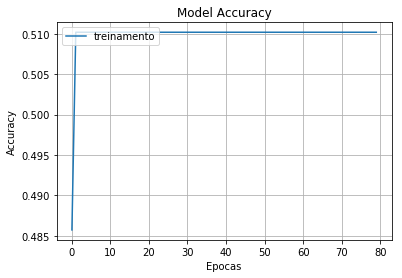

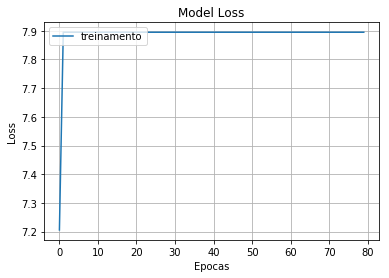

In [5]:
show_graphic(history)

## Testing Samples 

Probabilidade: 100.00 %


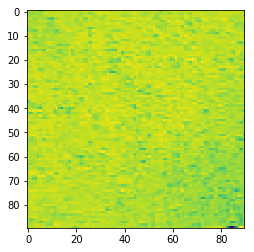

In [6]:
caminho_imagem_test = "test_samples/pp.jpg"
test_image(caminho_imagem_test)